In [17]:
from pokemon_classification_functions import get_datapoints, get_testpoints, scatter_plot_datapoints, output_classification_for_testpoints, get_user_input_pokemon_height, get_user_input_pokemon_width, get_k_nearest_neighbors, get_accuracy_from_random_data_split

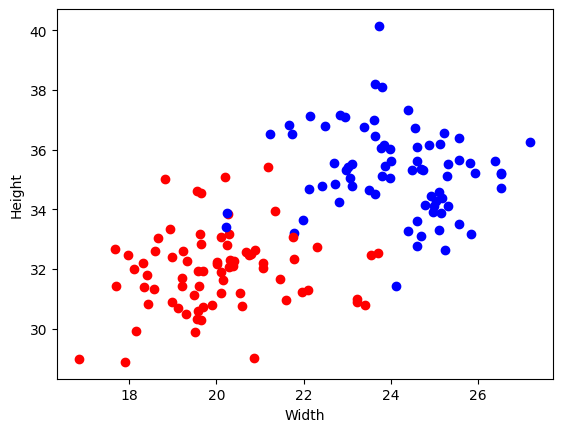

In [18]:
datapoints = get_datapoints() # The data is collected from datapoints.txt

scatter_plot_datapoints(datapoints)

In [19]:
testpoints = get_testpoints() # The data is collected from testpoints.txt

output_classification_for_testpoints(testpoints, datapoints)

Sample with (width, height): (25.0, 32.0) classified as Pikachu
Sample with (width, height): (24.2, 31.5) classified as Pikachu
Sample with (width, height): (22.0, 34.0) classified as Pikachu
Sample with (width, height): (20.5, 34.0) classified as Pichu


In [20]:
# Let user input height and weight and create point of input values
user_pokemon_height = get_user_input_pokemon_height()
user_pokemon_width = get_user_input_pokemon_width()
user_point = (user_pokemon_height, user_pokemon_width)

nearest_neighbors = get_k_nearest_neighbors(user_point, datapoints, k=10)

# Loop the neighbors to get the amount of Pikachus and Pichus
amount_pikachu = 0
amount_pichu = 0
for neighbor in nearest_neighbors:
    if neighbor["label"] == 1:
        amount_pikachu += 1
    elif neighbor["label"] == 0:
        amount_pichu += 1

# TODO: If there are equal amount of Pikachu and Pichu, ignore the tenth nearest (only use 9 nearest)

# When an even number is used as k when fining nearest neighbors, it could result in equal amount
if amount_pikachu == amount_pichu:
    print(f"Sample with (width, height): {user_point} could not be classified")
else:
    classification = "Pikachu" if amount_pikachu > amount_pichu else "Pichu"
    print(f"Sample with (width, height): {user_point} classified as {classification}")

Sample with (width, height): (33.0, 33.0) classified as Pikachu


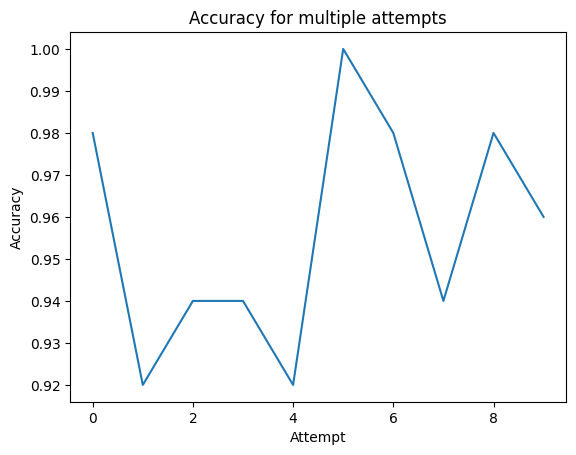

Average accuracy is 0.96


In [26]:
import matplotlib.pyplot as plt

amount_of_attempts = 10
attempts_indexes = range(amount_of_attempts)
accuracies = [get_accuracy_from_random_data_split() for _ in attempts_indexes]
average_accuracy = sum(accuracies) / len(accuracies)

plt.title("Accuracy for multiple attempts")
plt.xlabel("Attempt")
plt.ylabel("Accuracy")
plt.plot(attempts_indexes, accuracies)
plt.show()

print(f"Average accuracy is {average_accuracy:.2f}")